In [70]:
#importy bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
#loading data
#dane już oczyszcone, skipujemy preprocessing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
X = pd.DataFrame(data = housing.data, columns = housing.feature_names)
print(X.head())

y=housing.target()

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


TypeError: 'numpy.ndarray' object is not callable

Polecenia:
Zbuduj regresję
1. liniowa
2. wielomianowa stopnia 2 
3. wielomianowa stopnia 3
4. z wykorzystaniem k-NN
Wykorzystaj walidacje krzyzowa RepeatedKFold
Porównaj wyniki na wyrkesie

In [76]:
#Model liniowy
modelLiniowy = LinearRegression()
scores_nl = cross_val_score(modelLiniowy, X, y, scoring=scoring, cv=cv)
print(scores_nl)

[-0.53286851 -0.52878709 -0.53770585 -0.52744413 -0.5316177  -0.51838361
 -0.54599058 -0.54441511 -0.52572175 -0.52433106 -0.53594667 -0.5264349
 -0.52975192 -0.53645394 -0.52883193 -0.52756796 -0.53376565 -0.54080917
 -0.52410467 -0.5328948  -0.53331152 -0.54714239 -0.52155503 -0.53514727
 -0.53577333]


In [77]:
#Wielomian drugiego stopnia
polySecondDegree = PolynomialFeatures(degree=2)
X_poly_2nd = polySecondDegree.fit_transform(X)

scores_poly_2nd = cross_val_score(modelLiniowy, X_poly_2nd, y, scoring=scoring, cv=cv)
print(scores_poly_2nd)

[-0.46068688 -0.46520339 -0.48962711 -0.53463121 -0.46972893 -0.45852361
 -0.5073441  -0.55725589 -0.45461183 -0.45874716 -0.48855883 -0.46910137
 -0.46268312 -0.4657843  -0.53521965 -0.46827252 -0.65348789 -0.48126515
 -0.45291146 -0.47421852 -0.46808185 -0.73837247 -0.46453799 -0.47494396
 -0.46972059]


In [78]:
#Wielomian trzeciego stopnia
polyThirdDegree = PolynomialFeatures(degree=3)
X_poly_3rd = polyThirdDegree.fit_transform(X)

scores_poly_3rd = cross_val_score(modelLiniowy, X_poly_3rd, y, scoring=scoring, cv=cv)
print(scores_poly_3rd)

[ -0.43968622  -0.43428826  -4.02509124  -2.62357842  -0.45131546
  -0.47619153  -9.91576288 -11.46351919  -0.51660074  -0.42990658
  -9.86259133  -0.54690445  -0.58489421  -0.44177124  -5.62124581
  -0.48334991 -35.89226447  -0.49744861  -0.42542696  -1.88912328
  -0.44278599 -77.02171695  -0.6509718   -0.48696622  -0.49227024]


In [79]:
#k-NN
neighbours = KNeighborsRegressor(n_neighbors=2)
scores_kNN = cross_val_score(neighbours, X, y, scoring=scoring, cv=cv)
print(scores_kNN)

[-0.84889867 -0.85632577 -0.8537272  -0.86152211 -0.85155007 -0.83103903
 -0.85333422 -0.86063006 -0.85547732 -0.87317075 -0.85252258 -0.83285176
 -0.84897123 -0.85087678 -0.84265897 -0.84168493 -0.8609756  -0.85977332
 -0.84119082 -0.86223421 -0.84608317 -0.84810528 -0.85852155 -0.85837224
 -0.86699582]


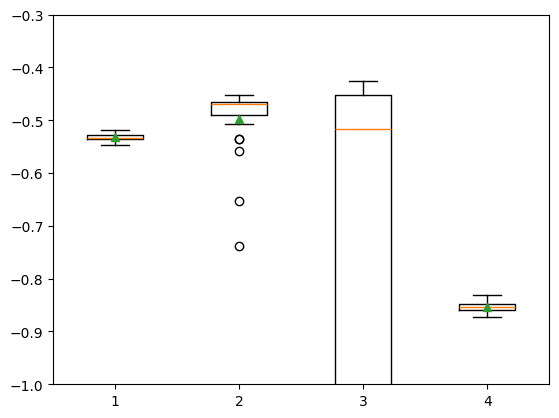

In [90]:
plt.boxplot([scores_nl, scores_poly_2nd, scores_poly_3rd, scores_kNN], showmeans = True)
plt.ylim(-1, -0.3)
plt.show()